手动实现感知机学习算法的原始形式，其中将参数 w 和 b 合并为一个参数向量，方便实现：
$\vec{w}=<w^{(1)},w^{(2)},...,w^{(n)},b>$，
$\vec{x_i}=<x_i^{(1)}, x_i^{(2)},...,x_i^{(n)}>$，那么$w\cdot x+b$
就可简写为：$w\cdot x$，实现时更方便。

准备鸢尾花数据集

In [1]:
from sklearn import datasets

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [10]:
iris = datasets.load_iris()
print(iris['data'].shape, iris['target'].shape) # (150, 4) (150,) 一共有4个特征
print(iris['target'][:5], iris['target'][50:55], iris['target'][100:105])

X = iris.data[:100,[0,2]] # 只使用2个特征:sepal length 和 petal length 以及2个类别
y = iris.target[:100]
y = np.where(y==1, 1, -1) # 1表示setosa杂色鸢尾，-1表示负例
print('Class labels:', np.unique(y))
print(X.shape, y.shape)

(150, 4) (150,)
[0 0 0 0 0] [1 1 1 1 1] [2 2 2 2 2]
Class labels: [-1  1]
(100, 2) (100,)


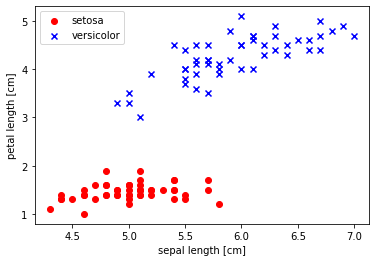

In [14]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [5]:
class Perceptron(object):
     """Perceptron classifier.

     Parameters
     ------------
     eta : float 学习率 (between 0.0 and 1.0)
     n_iter : int 迭代次数. 整个训练迭代完一次叫一次iter（或epoch）
     random_state : int 用于初始化参数的随机数种子

     Attributes
     -----------
     w_ : 1d-array 模型权重参数 需要通过训练求得
     errors_ : list 每次迭代中，误分类点个数
     """
     def __init__(self, eta=0.01, n_iter=50, random_state=1):
         self.eta = eta
         self.n_iter = n_iter
         self.random_state = random_state

     def fit(self, X, y):
         """Fit training data.

         Parameters
        ----------
         X : {array-like}, shape = [n_samples, n_features] 训练集样本shape [样本数，样本特征数]
         y : array-like, shape = [n_samples], 真实类别标记

         Returns
         -------
         self : object
         """
         rgen = np.random.RandomState(self.random_state) # 用于初始化w
         # # 使用正态分布初始化w, 注意w 是考虑了bias的增广向量<w,b>
         self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
         self.errors_ = []
         for _ in range(self.n_iter):
             errors = 0
             for xi, target in zip(X, y):
                 # uodate用于计算 \eta*yi
                 # 注意，当x_i被正确分类时，target - self.predict(xi)=0，即update=0，不更新
                 # 当target - self.predict(xi)不等于0时，update = +2*\eta 或者 -2*\eta
                 # 这样实现是为了代码更简洁。当然也可以直接先判断target * self.predict(xi)的符号
                 # 只有异号时才进行update的计算：update = \eta* target即+1*\eta 或者-1*\eta
                 update = self.eta * (target - self.predict(xi))
                 self.w_[1:] += update * xi # 更新w
                 self.w_[0] += update # 更新b
                 errors += int(update != 0.0)
             self.errors_.append(errors)
         return self

     def net_input(self, X):
         """Calculate net input"""
         return np.dot(X, self.w_[1:]) + self.w_[0]

     def predict(self, X):
         """Return class label after unit step"""
         return np.where(self.net_input(X) >= 0.0, 1, -1)

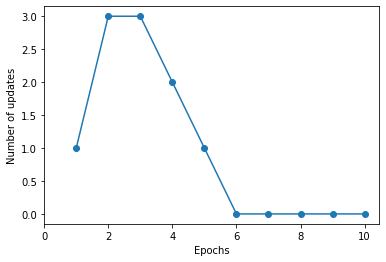

In [12]:
# 训练
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.xlim(0)
plt.show()

In [8]:
# 绘制分类决策边界：
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
     # setup marker generator and color map
     markers = ('s', 'x', 'o', '^', 'v')
     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
     cmap = ListedColormap(colors[:len(np.unique(y))])

     # plot the decision surface
     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
     Z = Z.reshape(xx1.shape)
     plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
     plt.xlim(xx1.min(), xx1.max())
     plt.ylim(xx2.min(), xx2.max())

     for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
         alpha=0.8, c=colors[idx],
         marker=markers[idx], label=cl,
         edgecolor='black')

     # highlight test samples
     if test_idx:
         # plot all samples
         X_test, y_test = X[test_idx, :], y[test_idx]
         plt.scatter(X_test[:, 0], X_test[:, 1],
                     c='', edgecolor='black', alpha=1.0,
                     linewidth=1, marker='o',
                     s=100, label='test set')

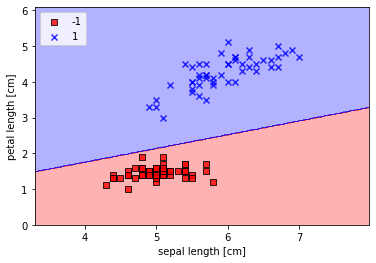

In [13]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()